# Second lab: Go kernelize yourself!

Today we get things done for vertex cover, and try several approaches we've seen so far. We compare them with respect to the time they consume...

We shall use the library dealing with time (thus adding ```import time``` in our preamble) for measuring our success (or deceptions)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Task 1 

Familiarize yourself with random graph generators. Among others, consider several [random models](https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.random_graphs):
* the standard Erdős-Rényi model,
* Barabasi Albert model,
* Watts-Strogatz small world model.

In [ ]:
G=nx.random_graphs.fast_gnp_random_graph(50,.5)

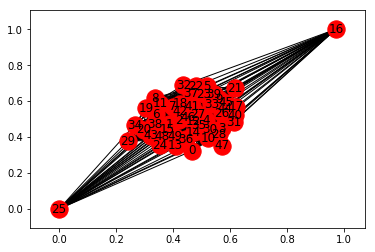

In [ ]:
nx.draw_networkx(G)

In [ ]:
E=nx.edge_dfs(G)
(u,v)=next(E)
G.degree(u)

18

### Task 2

Implement the function ```branching_vc``` which takes a graph ```G``` and an integer ```k``` as an input and explore with the basic bounded search tree technique. It should return ```True``` or ```False```.

In [ ]:
def branching_vc(G,k):
    if k < 0 : 
        return False
    elif k == 0:
        return nx.is_empty(G)
    elif nx.is_empty(G):
        return True
    else: 
        E = nx.edge_dfs(G)
        (u,v) = next(E)
        N = G.neighbors(u)
        d = G.degree(u)
        G1 = G.copy()
        G1.remove_node(u)
        G2 = G.copy()
        G2.remove_nodes_from(N)
        v1 = branching_vc(G1,k-1)
        v2 = branching_vc(G2, k-d)
        return (v1 or v2)

### Task 3 

Here is a way of testing your method on graphs of specific order ```n``` and specific density ```p```(obtained through Erdős-Rényi model. Read it, understand it, adapt it to your taste.

In [ ]:
def time_for_k (kmax,n,p,tries, method):
    av_time = []
    time_table=[]
    acc_table=[]
    for k in range(kmax):
        for i in range(tries):
            G=nx.random_graphs.fast_gnp_random_graph(n,p)
            t = time.process_time()
            l = method(G,k)
            duration = time.process_time()-t
            time_table.append(duration)
        av_time.append(sum(time_table)/len(time_table))
    plt.plot(range(kmax),av_time,'b+')
    plt.xlabel('value of k')
    plt.ylabel('time in sec.')
    plt.title('time as a function of k')
    plt.show()
    return av_time

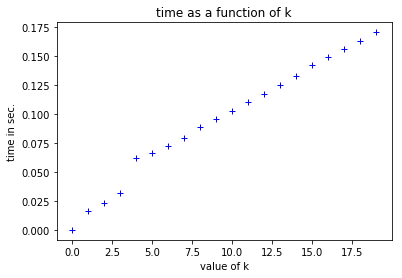

In [ ]:
l = time_for_k(20, 100,.4,1,branching_vc)

### Task 4

Implement kernelizing rules VC1 (no isolated vertex), VC2 (take all vertices of degree k+1 or more), and VC3 (if VC1 and VC2 do not apply and more than k²+k vertices return a NO-instance).

In [ ]:
def vc1(G,k):
    H = G.copy()
    H.remove_nodes_from(list(nx.isolates(H)))
    return (H,k)

def vc2(G,k):
    count = 0
    H = G.copy()
    for u in H.nodes():
        if H.degree(u)>k:
            H.remove_node(u)
            count = count + 1
    return (H,k-count)

def vc3(G,k):
    n = G.order()
    if n > k**2 + k:
        return (nx.complete_graph(2), -1)
    else :
        return (G,k)
    
def kernelize_simple(G,k):
    decrease=True
    G2 = G.copy()
    while decrease:
        n = G2.order()
        (G1,k1) = vc1(G,k)
        (G2,k2) = vc2(G1,k1)
        if n == G2.order() :
            decrease = False
    return vc3(G2,k2)

In [ ]:
def vc_fpt_1(G,k):
    (G1,k1) = kernelize_simple(G,k)
    return branching_vc(G1,k1)

In [ ]:
vc_fpt_1(G,50)

True

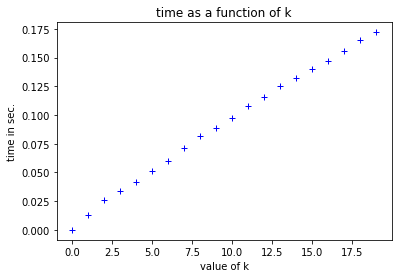

In [ ]:
l = time_for_k(20, 100,.4,1,branching_vc)

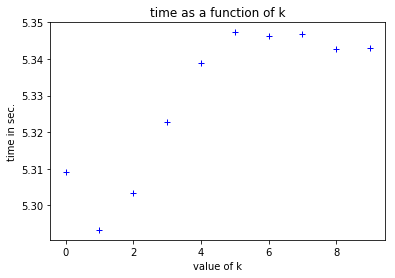

In [ ]:
l = time_for_k(10, 1000,.4,3,vc_fpt_1)